# Low-Frequency Passive Seismic (LFPS) method using lfpspy

In [1]:
# Import module needed
import os, time

from lfpspy import Spectral, WindowReject, Polarization, Result
from lfpspy.utils import *

## Spectral Analysis

### Single processing

---------------------------example_data.mseed---------------------------
Performed 3 iterations, returning b/c rejection converged
Initial Windows = 719, Remaining Windows = 669, Windows Rejected = 50
Performed 6 iterations, returning b/c rejection converged
Initial Windows = 719, Remaining Windows = 622, Windows Rejected = 97
------------------------------------------------------------------------


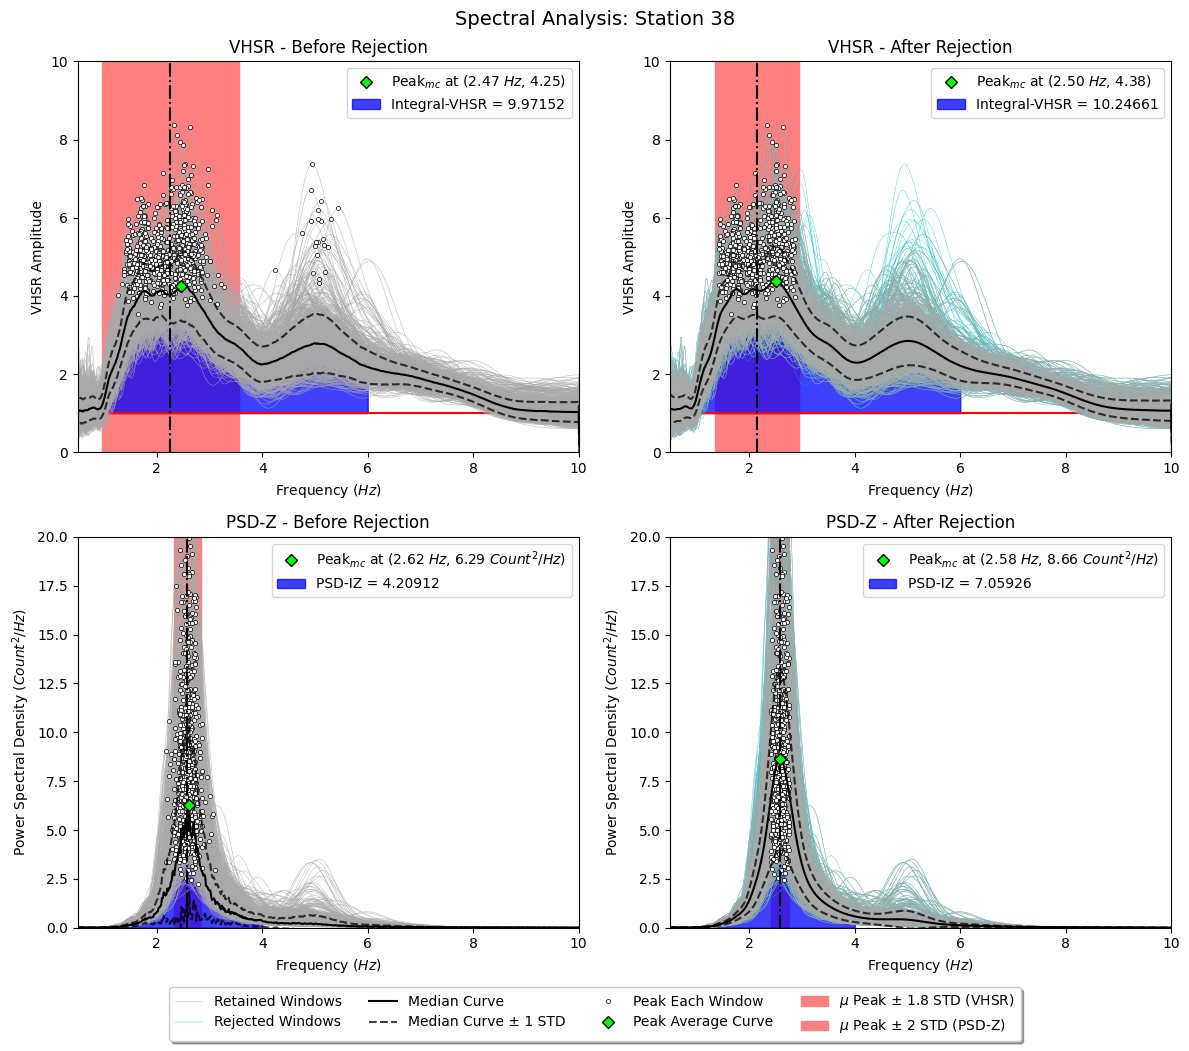

Execution time: 00:00:23


In [2]:
st = time.time()

# Define file (per station) or folder (all station) and window length, and other parameters that will be used
fname = "data/example_data.mseed"
window, overlap = 60, 0.5 # window length in seconds; how much we want our data overlap per window
n_input_vh, n_input_psd, max_iter = 1.8, 2, 50 # n parameter to decide how much we want to reject; depending on variance of the data
lb, hb_vh, hb_psd = 1, 6, 4 #in Hz; lower bound (both) and upper bound (each) for limiting the zone of interest in vhsr and psd

# Create data frame to save the calculation later
# df = create_df_spectral()

# Instantiating object
spc, wr, res = Spectral(fname, win_length=window), WindowReject(fname, window), Result(fname, window)

# Performing spectral ratio and power spectral density processing
vh_res, vh_avg, vh_std, vh_int_bfr, psd_res, psd_avg, psd_std, psd_iz_bfr = spc.calculate(width=0.1, lc=0.5, hc=10, fs=100, order=5, d=overlap, overlap=True)

# Applying window rejection to spectral ratio and power spectral density result; Achieving better result
# Performing Frequency-domain Window-rejection algorithm (Cox et.al., 2020)
print('---------------------------{}---------------------------'.format(fname.split("/")[-1]))
vh_reject, vh_med_curve, vh_std_curve, vh_med_f0_bfr, vh_std_f0_bfr, vh_med_f0_aft, vh_std_f0_aft, vh_n, vh_acc = wr.calculate(
    vh_res, n=n_input_vh, max_iter=max_iter)
vh_int_aft = spc.integral_area_vhsr(vh_med_curve)
psd_reject, psd_med_curve, psd_std_curve, psd_med_f0_bfr, psd_std_f0_bfr, psd_med_f0_aft, psd_std_f0_aft, psd_n, psd_acc = wr.calculate(
    psd_res, n=n_input_psd, max_iter=max_iter)
psd_iz_aft = spc.integral_area_psd(psd_med_curve)
print('------------------------------------------------------------------------')

# Plotting and saving the result
res.plot_spectral(vh_res, vh_reject, vh_avg, vh_med_curve, vh_std, vh_std_curve,
                  vh_med_f0_bfr, vh_std_f0_bfr, vh_med_f0_aft, vh_std_f0_aft, vh_int_bfr,
                  vh_int_aft, vh_n, psd_res, psd_reject, psd_avg, psd_med_curve,
                  psd_std, psd_std_curve, psd_med_f0_bfr, psd_std_f0_bfr, psd_med_f0_aft,
                  psd_std_f0_aft, psd_iz_bfr, psd_iz_aft, psd_n, low_bound=lb,
                  high_bound_vh=hb_vh, high_bound_psd=hb_psd, xmin=0.5, xmax=10, ymin=0, ymax_vh=10,
                  ymax_psd=20, batch_proc=False)
# list_spectral(df, spc.Z, spc.frq, spc.frq.tolist().index(lb), spc.frq.tolist().index(hb_vh), spc.frq.tolist().index(hb_psd),
#               vh_int_aft, vh_med_curve, vh_acc, psd_iz_aft, psd_med_curve, psd_acc)

# Exporting data frame containing calculation result to .xlsx file
#to_excel_spectral(df, "batch_test/Spectral Analysis Calculation-raw python")

elapsed_time = time.time() - st
print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

### Batch processing

In [3]:
st = time.time()

# Define file (per station) or folder (all station), window length, and other parameters that will be used
dir = "C:/Users/PC-MSI/Downloads/five_raw_data_example"
window, overlap = 60, 0.5 # window length in seconds; how much we want our data overlap per window
n_input_vh, n_input_psd, max_iter = 1.8, 2, 50 # n parameter to decide how much we want to reject; depending on variance of the data
lb, hb_vh, hb_psd = 1, 6, 4 #in Hz; lower bound (both) and upper bound (each) for limiting the zone of interest in vhsr and psd

# Create data frame to save the calculation later
df = create_df_spectral()

# Listing for each file in the directory given
for fname in os.listdir(dir):
    if fname.endswith('.mseed'):
        # Instantiating object
        fname = os.path.join(dir, fname)
        spc, wr, res = Spectral(fname, win_length=window), WindowReject(fname, window), Result(fname, window)

        # Performing spectral ratio and power spectral density processing
        vh_res, vh_avg, vh_std, vh_int_bfr, psd_res, psd_avg, psd_std, psd_iz_bfr = spc.calculate(width=0.1, lc=0.5, hc=10, fs=100, order=5, d=overlap, overlap=True)

        # Applying window rejection to spectral ratio and power spectral density result; Achieving better result
        # Performing Frequency-domain Window-rejection algorithm (Cox et.al., 2020)
        print('---------------------------{}---------------------------'.format(fname.split("\\")[-1]))
        vh_reject, vh_med_curve, vh_std_curve, vh_med_f0_bfr, vh_std_f0_bfr, vh_med_f0_aft, vh_std_f0_aft, vh_n, vh_acc = wr.calculate(
            vh_res, n=n_input_vh, max_iter=max_iter)
        vh_int_aft = spc.integral_area_vhsr(vh_med_curve)
        psd_reject, psd_med_curve, psd_std_curve, psd_med_f0_bfr, psd_std_f0_bfr, psd_med_f0_aft, psd_std_f0_aft, psd_n, psd_acc = wr.calculate(
            psd_res, n=n_input_psd, max_iter=max_iter)
        psd_iz_aft = spc.integral_area_psd(psd_med_curve)
        print('------------------------------------------------------------------------------')

        # Plotting and saving the result for each iteration
        res.plot_spectral(vh_res, vh_reject, vh_avg, vh_med_curve, vh_std, vh_std_curve,
                          vh_med_f0_bfr, vh_std_f0_bfr, vh_med_f0_aft, vh_std_f0_aft, vh_int_bfr,
                          vh_int_aft, vh_n, psd_res, psd_reject, psd_avg, psd_med_curve,
                          psd_std, psd_std_curve, psd_med_f0_bfr, psd_std_f0_bfr, psd_med_f0_aft,
                          psd_std_f0_aft, psd_iz_bfr, psd_iz_aft, psd_n, low_bound=lb,
                          high_bound_vh=hb_vh, high_bound_psd=hb_psd, xmin=0.5, xmax=10, ymin=0, ymax_vh=10,
                          ymax_psd=1, batch_proc=True) # Change batch_proc to True for batch processing
        list_spectral(df, spc.Z, spc.frq, spc.frq.tolist().index(lb), spc.frq.tolist().index(hb_vh), spc.frq.tolist().index(hb_psd),
                      vh_int_aft, vh_med_curve, vh_acc, psd_iz_aft, psd_med_curve, psd_acc)
        
# Exporting data frame containing calculation result from all iteration to .xlsx file
to_excel_spectral(df, "batch_test/Spectral Analysis Calculation-raw python")

elapsed_time = time.time() - st
print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

---------------------------02_MJ_230826_17-23.mseed---------------------------
Performed 9 iterations, returning b/c rejection converged
Initial Windows = 719, Remaining Windows = 563, Windows Rejected = 156
Performed 9 iterations, returning b/c rejection converged
Initial Windows = 719, Remaining Windows = 560, Windows Rejected = 159
------------------------------------------------------------------------------
---------------------------21_MJ_230824_17-23.mseed---------------------------
Performed 21 iterations, returning b/c rejection converged
Initial Windows = 719, Remaining Windows = 335, Windows Rejected = 384
Performed 12 iterations, returning b/c rejection converged
Initial Windows = 719, Remaining Windows = 331, Windows Rejected = 388
------------------------------------------------------------------------------
---------------------------35_MJ_230824_17-23.mseed---------------------------
Performed 2 iterations, returning b/c rejection converged
Initial Windows = 719, Remain

## Polarization Analysis

### Single processing

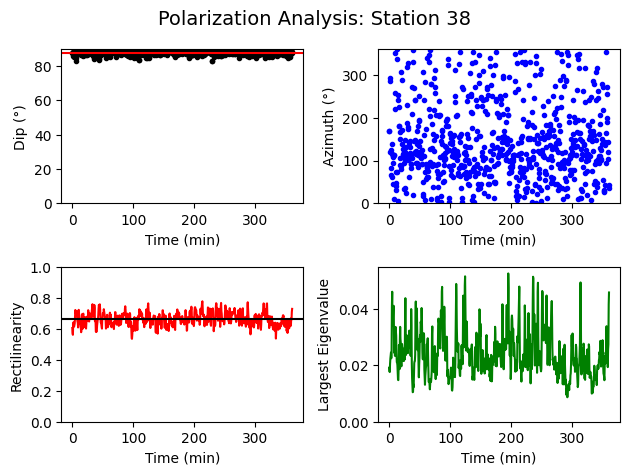

Execution time: 00:00:03


In [4]:
st = time.time()

# Define file (per station) or folder (all station) and window length will be used
fname = "data/example_data.mseed"
window, overlap = 60, 0.5 # window length in seconds; how much we want our data overlap per window

# Create data frame to save the calculation later
df = create_df_polar()

# Instantiating object
plr, res = Polarization(fname, win_length=window), Result(fname, window)

# Performing polarization analysis on raw passive seismic data
azimuth, incidence, rectilinearity, planarity, max_eig, xtime = plr.calculate(lc=0.5, hc=10, fs=100, order=5, d=overlap, overlap=True)

# Plotting and saving the result
res.plot_polar(azimuth, incidence, rectilinearity, planarity, max_eig, xtime, batch_proc=False)
#res.to_excel_polar("Polarization Analysis Calculation-raw python")

# Exporting data frame containing calculation result from all iteration to .xlsx file
#to_excel_polar(df, "batch_test/Polarization Analysis Calculation-raw python")

elapsed_time = time.time() - st
print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

### Batch processing

In [5]:
st = time.time()

# Define file (per station) or folder (all station) and window length will be used
dir = "C:/Users/PC-MSI/Downloads/five_raw_data_example"
window, overlap = 60, 0.5 # window length in seconds; how much we want our data overlap per window

# Create data frame to save the calculation later
df = create_df_polar()

# Listing for each file in the directory given
for fname in os.listdir(dir):
    if fname.endswith('.mseed'):
        # Instantiating object
        fname = os.path.join(dir, fname)
        plr, res = Polarization(fname, win_length=window), Result(fname, window)

        # Performing polarization analysis on raw passive seismic data
        azimuth, incidence, rectilinearity, planarity, max_eig, xtime = plr.calculate(lc=0.5, hc=10, fs=100, order=5, d=overlap, overlap=True)

        # Plotting and saving the result of each iteration
        res.plot_polar(azimuth, incidence, rectilinearity, planarity, max_eig, xtime, batch_proc=True) # Change batch_proc to True for batch processing
        list_polar(df, plr.Z, azimuth, incidence, rectilinearity, planarity, max_eig)

# Exporting data frame containing calculation result from all iteration to .xlsx file
to_excel_polar(df, "batch_test/Polarization Analysis Calculation-raw python")

elapsed_time = time.time() - st
print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Execution time: 00:00:15
